In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv

In [9]:
## Subset both the taxonomy dataframes.
nodeTax = pd.read_csv('../data/notebooks_out/viral_df_taxonomy.csv',index_col=0)

# A few rules for subsetting.

# Has to have family assigned at least
nodeTax = nodeTax[nodeTax['family'] != 'Unclassified']
# Has to fall in a 'insect infecting-like family'.
insectVirFam = ['Parvoviridae','Dicistroviridae','Rhabdoviridae',
               'Iflaviridae','Iridoviridae','Orthomyxoviridae','Nodaviridae','Phenuiviridae','Astroviridae']
nodeTax = nodeTax[nodeTax['family'].isin(insectVirFam)]

sraTax = pd.read_csv('../data/notebooks_out/viral_df_taxonomy_SRA.csv',index_col=0)
sraTax = sraTax[sraTax['family'] != 'Unclassified']
sraTax = sraTax[sraTax['family'].isin(insectVirFam)]

In [21]:
#Read in coverage matrix.
covmatsra = pd.read_csv("../data/Pcoa/SRA_df_coverage_lengthnorm.tsv", sep=',', index_col=0)
covmatbe = pd.read_csv("../data/Pcoa/flembee_df_coverage_lengthnorm.tsv", sep=",", index_col=0)
covmatbe = covmatbe.T
covmat = pd.concat([covmatsra, covmatbe], axis=0, join='outer')
covmat = covmat[covmat.columns.intersection(list(sraTax.index) + list(nodeTax.index))]

In [27]:
#Now we need information on the eukaryotic family of the host to begin with. For now we keep the flemish bee samples as seperate from apidae.
metadatdf = pd.read_csv("../data/Metadata_location_year_study_kind.csv", sep=";")
list(metadatdf[metadatdf['Tax_family'] == 'Formicidae']['Run'])

#We will only seperate families where we have more than 10 samples each, the others will be collapsed in an 'other'group.
#To start we just take the contig representatives.
Belgium_runs = list(covmatbe.index)
Formicidae_runs = list(metadatdf[metadatdf['Tax_family'] == 'Formicidae']['Run'])
Apidae_runs = list(metadatdf[metadatdf['Tax_family'] == 'Apidae']['Run'])
Vespidae_runs = list(metadatdf[metadatdf['Tax_family'] == 'Vespidae']['Run'])
Halictidae_runs = list(metadatdf[metadatdf['Tax_family'] == 'Halictidae']['Run'])
Braconidae_runs = list(metadatdf[metadatdf['Tax_family'] == 'Braconidae']['Run'])
Megachilidae_runs = list(metadatdf[metadatdf['Tax_family'] == 'Megachilidae']['Run'])
Pteromalidae_runs = list(metadatdf[metadatdf['Tax_family'] == 'Pteromalidae']['Run'])
Cephidae_runs = list(metadatdf[metadatdf['Tax_family'] == 'Cephidae']['Run'])
Figitidae_runs = list(metadatdf[metadatdf['Tax_family'] == 'Figitidae']['Run'])
Gathered = Belgium_runs + Formicidae_runs + Apidae_runs + Vespidae_runs + Halictidae_runs + Braconidae_runs + Megachilidae_runs + Pteromalidae_runs + Cephidae_runs + Figitidae_runs
Others_runs = []
for i in list(metadatdf['Run']):
    if i not in Gathered:
        Others_runs.append(i)

In [28]:
#Sanity test to see if we didn't miss anything:
len(covmat) == len(Belgium_runs) + len(Formicidae_runs) + len(Apidae_runs) + len(Vespidae_runs) + len(Halictidae_runs) + len(Braconidae_runs) + len(Megachilidae_runs) + len(Pteromalidae_runs) + len(Cephidae_runs) + len(Figitidae_runs) + len(Others_runs)

True

In [29]:
#Now subset the coverage matrix, so we have 1 matrix / eukaryotic family.
Belgium_cov = covmat[covmat.index.isin(Belgium_runs)]
Formicidae_cov = covmat[covmat.index.isin(Formicidae_runs)]
Apidae_cov = covmat[covmat.index.isin(Apidae_runs)]
Vespidae_cov = covmat[covmat.index.isin(Vespidae_runs)]
Halictidae_cov = covmat[covmat.index.isin(Halictidae_runs)]
Braconidae_cov = covmat[covmat.index.isin(Braconidae_runs)]
Megachilidae_cov = covmat[covmat.index.isin(Megachilidae_runs)]
Pteromalidae_cov = covmat[covmat.index.isin(Pteromalidae_runs)]
Cephidae_cov = covmat[covmat.index.isin(Cephidae_runs)]
Figitidae_cov = covmat[covmat.index.isin(Figitidae_runs)]
Others_cov = covmat[covmat.index.isin(Others_runs)]

<AxesSubplot:>

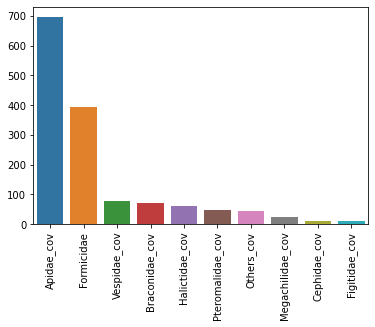

In [30]:
#Just get some barplots on the samples per eukaryotic family. This is quite skewed, but we assume that they are sampled completely. (This is a big flaw, but can't do anything about it).
famlen = [len(Apidae_cov) + len(Belgium_cov), len(Formicidae_cov),len(Vespidae_cov),len(Braconidae_cov),len(Halictidae_cov),len(Pteromalidae_cov),len(Others_cov),len(Megachilidae_cov),len(Cephidae_cov),len(Figitidae_cov)]
g = sns.barplot(x = ['Apidae_cov','Formicidae','Vespidae_cov','Braconidae_cov','Halictidae_cov','Pteromalidae_cov','Others_cov','Megachilidae_cov','Cephidae_cov','Figitidae_cov'], y=famlen)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g

In [31]:
#Now get lists of the representative contigs in each of the families.
Belgium_contigs = []
for i in list(covmat.columns):
    if 'BP' in i or 'BeeP' in i:
        Belgium_contigs.append(i)
Formicidae_contigs  = []
for i in list(covmat.columns):
    if i.split('.')[0] in Formicidae_runs:
        Formicidae_contigs.append(i)
Apidae_contigs  = []
for i in list(covmat.columns):
    if i.split('.')[0] in Apidae_runs:
        Apidae_contigs.append(i)
Vespidae_contigs  = []
for i in list(covmat.columns):
    if i.split('.')[0] in Vespidae_runs:
        Vespidae_contigs.append(i)
Halictidae_contigs  = []
for i in list(covmat.columns):
    if i.split('.')[0] in Halictidae_runs:
        Halictidae_contigs.append(i)
Braconidae_contigs  = []
for i in list(covmat.columns):
    if i.split('.')[0] in Braconidae_runs:
        Braconidae_contigs.append(i)
Megachilidae_contigs  = []
for i in list(covmat.columns):
    if i.split('.')[0] in Megachilidae_runs:
        Megachilidae_contigs.append(i)
Pteromalidae_contigs  = []
for i in list(covmat.columns):
    if i.split('.')[0] in Pteromalidae_runs:
        Pteromalidae_contigs.append(i)
Cephidae_contigs  = []
for i in list(covmat.columns):
    if i.split('.')[0] in Cephidae_runs:
        Cephidae_contigs.append(i)
Figitidae_contigs  = []
for i in list(covmat.columns):
    if i.split('.')[0] in Figitidae_runs:
        Figitidae_contigs.append(i)
Others_contigs = []
for i in list(covmat.columns):
    if i.split('.')[0] in Others_runs:
        Others_contigs.append(i)

[1660, 399, 100, 79, 23, 14, 37, 2, 3, 0]
2317


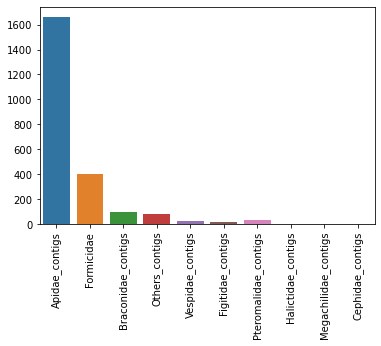

In [32]:
famlen = [len(Apidae_contigs) + len(Belgium_contigs), len(Formicidae_contigs),len(Braconidae_contigs),len(Others_contigs), len(Vespidae_contigs),len(Figitidae_contigs),len(Pteromalidae_contigs),len(Halictidae_contigs),len(Megachilidae_contigs),len(Cephidae_contigs)]
print(famlen)
g = sns.barplot(x = ['Apidae_contigs','Formicidae','Braconidae_contigs','Others_contigs','Vespidae_contigs','Figitidae_contigs','Pteromalidae_contigs','Halictidae_contigs','Megachilidae_contigs','Cephidae_contigs'], y=famlen)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g
print(sum(famlen))

In [33]:
#Sanity test to see if we have all contigs.
sum(famlen) == len(covmat.columns)

True

In [34]:
#now evaluate presence (defined as a relative count > 0.1 (assuming average of 100bp reads, this would be 10x covered, and the average is actually ~189))
#This treshold needs to be true for 10% of the samples of a particular family, and then it's appended.
#Create an edge list
#We have kept Belgium and Apidae in seperate lists / dfs, but we want to combine them here.
Apidae2_cov = pd.concat([Apidae_cov, Belgium_cov])
Apidae2_contigs = Apidae_contigs + Belgium_contigs


virus_sharing = []
#Apidae vs the rest.
Api_Formi= Formicidae_cov[Apidae2_contigs][Formicidae_cov[Apidae2_contigs] > 0.1].count()
virus_sharing.append(['Apidae','Formicidae',len(Api_Formi[Api_Formi > len(Formicidae_cov)*0.1])])
Api_Vespi= Vespidae_cov[Apidae2_contigs][Vespidae_cov[Apidae2_contigs] > 0.1].count()
virus_sharing.append(['Apidae','Vespidae',len(Api_Vespi[Api_Vespi > len(Vespidae_cov)*0.1])])
Api_Halict= Halictidae_cov[Apidae2_contigs][Halictidae_cov[Apidae2_contigs] > 0.1].count()
virus_sharing.append(['Apidae','Halictidae',len(Api_Halict[Api_Halict > len(Halictidae_cov)*0.1])])
Api_Braco= Braconidae_cov[Apidae2_contigs][Braconidae_cov[Apidae2_contigs] > 0.1].count()
virus_sharing.append(['Apidae','Braconidae',len(Api_Braco[Api_Braco > len(Braconidae_cov)*0.1])])
Api_Mega= Megachilidae_cov[Apidae2_contigs][Megachilidae_cov[Apidae2_contigs] > 0.1].count()
virus_sharing.append(['Apidae','Megachilidae',len(Api_Mega[Api_Mega > len(Megachilidae_cov)*0.1])])
Api_Ptero= Pteromalidae_cov[Apidae2_contigs][Pteromalidae_cov[Apidae2_contigs] > 0.1].count()
virus_sharing.append(['Apidae','Pteromalidae',len(Api_Ptero[Api_Ptero > len(Pteromalidae_cov)*0.1])])
Api_Cephi= Cephidae_cov[Apidae2_contigs][Cephidae_cov[Apidae2_contigs] > 0.1].count()
virus_sharing.append(['Apidae','Cephidae',len(Api_Cephi[Api_Cephi > len(Cephidae_cov)*0.1])])
Api_Figi= Figitidae_cov[Apidae2_contigs][Figitidae_cov[Apidae2_contigs] > 0.1].count()
virus_sharing.append(['Apidae','Figitidae',len(Api_Figi[Api_Figi > len(Figitidae_cov)*0.1])])
Api_Others= Others_cov[Apidae2_contigs][Others_cov[Apidae2_contigs] > 0.1].count()
virus_sharing.append(['Apidae','Others',len(Api_Others[Api_Others > len(Others_cov)*0.1])])

## Formicidae vs the rest.
Formi_Api= Apidae2_cov[Formicidae_contigs][Apidae2_cov[Formicidae_contigs] > 0.1].count()
virus_sharing.append(['Formicidae','Apidae',len(Formi_Api[Formi_Api > len(Apidae2_cov)*0.1])])
Formi_Vespi= Vespidae_cov[Formicidae_contigs][Vespidae_cov[Formicidae_contigs] > 0.1].count()
virus_sharing.append(['Formicidae','Vespidae',len(Formi_Vespi[Formi_Vespi > len(Vespidae_cov)*0.1])])
Formi_Halict= Halictidae_cov[Formicidae_contigs][Halictidae_cov[Formicidae_contigs] > 0.1].count()
virus_sharing.append(['Formicidae','Halictidae',len(Formi_Halict[Formi_Halict > len(Halictidae_cov)*0.1])])
Formi_Braco= Braconidae_cov[Formicidae_contigs][Braconidae_cov[Formicidae_contigs] > 0.1].count()
virus_sharing.append(['Formicidae','Braconidae',len(Formi_Braco[Formi_Braco > len(Braconidae_cov)*0.1])])
Formi_Mega= Megachilidae_cov[Formicidae_contigs][Megachilidae_cov[Formicidae_contigs] > 0.1].count()
virus_sharing.append(['Formicidae','Megachilidae',len(Formi_Mega[Formi_Mega > len(Megachilidae_cov)*0.1])])
Formi_Ptero= Pteromalidae_cov[Formicidae_contigs][Pteromalidae_cov[Formicidae_contigs] > 0.1].count()
virus_sharing.append(['Formicidae','Pteromalidae',len(Formi_Ptero[Formi_Ptero > len(Pteromalidae_cov)*0.1])])
Formi_Cephi= Cephidae_cov[Formicidae_contigs][Cephidae_cov[Formicidae_contigs] > 0.1].count()
virus_sharing.append(['Formicidae','Cephidae',len(Formi_Cephi[Formi_Cephi > len(Cephidae_cov)*0.1])])
Formi_Figi= Figitidae_cov[Formicidae_contigs][Figitidae_cov[Formicidae_contigs] > 0.1].count()
virus_sharing.append(['Formicidae','Figitidae',len(Formi_Figi[Formi_Figi > len(Figitidae_cov)*0.1])])
Formi_Others= Others_cov[Formicidae_contigs][Others_cov[Formicidae_contigs] > 0.1].count()
virus_sharing.append(['Formicidae','Others',len(Formi_Others[Formi_Others > len(Others_cov)*0.1])])

#Vespidae vs the rest.
Vespi_Formi= Formicidae_cov[Vespidae_contigs][Formicidae_cov[Vespidae_contigs] > 0.1].count()
virus_sharing.append(['Vespidae','Formicidae',len(Vespi_Formi[Vespi_Formi > len(Formicidae_cov)*0.1])])
Vespi_Api= Apidae2_cov[Vespidae_contigs][Apidae2_cov[Vespidae_contigs] > 0.1].count()
virus_sharing.append(['Vespidae','Apidae',len(Vespi_Api[Vespi_Api > len(Apidae2_cov)*0.1])])
Vespi_Halict= Halictidae_cov[Vespidae_contigs][Halictidae_cov[Vespidae_contigs] > 0.1].count()
virus_sharing.append(['Vespidae','Halictidae',len(Vespi_Halict[Vespi_Halict > len(Halictidae_cov)*0.1])])
Vespi_Braco= Braconidae_cov[Vespidae_contigs][Braconidae_cov[Vespidae_contigs] > 0.1].count()
virus_sharing.append(['Vespidae','Braconidae',len(Vespi_Braco[Vespi_Braco > len(Braconidae_cov)*0.1])])
Vespi_Mega= Megachilidae_cov[Vespidae_contigs][Megachilidae_cov[Vespidae_contigs] > 0.1].count()
virus_sharing.append(['Vespidae','Megachilidae',len(Vespi_Mega[Vespi_Mega > len(Megachilidae_cov)*0.1])])
Vespi_Ptero= Pteromalidae_cov[Vespidae_contigs][Pteromalidae_cov[Vespidae_contigs] > 0.1].count()
virus_sharing.append(['Vespidae','Pteromalidae',len(Vespi_Ptero[Vespi_Ptero > len(Pteromalidae_cov)*0.1])])
Vespi_Cephi= Cephidae_cov[Vespidae_contigs][Cephidae_cov[Vespidae_contigs] > 0.1].count()
virus_sharing.append(['Vespidae','Cephidae',len(Vespi_Cephi[Vespi_Cephi > len(Cephidae_cov)*0.1])])
Vespi_Figi= Figitidae_cov[Vespidae_contigs][Figitidae_cov[Vespidae_contigs] > 0.1].count()
virus_sharing.append(['Vespidae','Figitidae',len(Vespi_Figi[Vespi_Figi > len(Figitidae_cov)*0.1])])
Vespi_Others= Others_cov[Vespidae_contigs][Others_cov[Vespidae_contigs] > 0.1].count()
virus_sharing.append(['Vespidae','Others',len(Vespi_Others[Vespi_Others > len(Others_cov)*0.1])])

##Halictidae vs the rest.
Halict_Formi= Formicidae_cov[Halictidae_contigs][Formicidae_cov[Halictidae_contigs] > 0.1].count()
virus_sharing.append(['Halictidae','Formicidae',len(Halict_Formi[Halict_Formi > len(Formicidae_cov)*0.1])])
Halict_Api= Apidae2_cov[Halictidae_contigs][Apidae2_cov[Halictidae_contigs] > 0.1].count()
virus_sharing.append(['Halictidae','Apidae',len(Halict_Api[Halict_Api > len(Apidae2_cov)*0.1])])
Halict_Vespi= Vespidae_cov[Halictidae_contigs][Vespidae_cov[Halictidae_contigs] > 0.1].count()
virus_sharing.append(['Halictidae','Vespidae',len(Halict_Vespi[Halict_Vespi > len(Vespidae_cov)*0.1])])
Halict_Braco= Braconidae_cov[Halictidae_contigs][Braconidae_cov[Halictidae_contigs] > 0.1].count()
virus_sharing.append(['Halictidae','Braconidae',len(Halict_Braco[Halict_Braco > len(Braconidae_cov)*0.1])])
Halict_Mega= Megachilidae_cov[Halictidae_contigs][Megachilidae_cov[Halictidae_contigs] > 0.1].count()
virus_sharing.append(['Halictidae','Megachilidae',len(Halict_Mega[Halict_Mega > len(Megachilidae_cov)*0.1])])
Halict_Ptero= Pteromalidae_cov[Halictidae_contigs][Pteromalidae_cov[Halictidae_contigs] > 0.1].count()
virus_sharing.append(['Halictidae','Pteromalidae',len(Halict_Ptero[Halict_Ptero > len(Pteromalidae_cov)*0.1])])
Halict_Cephi= Cephidae_cov[Halictidae_contigs][Cephidae_cov[Halictidae_contigs] > 0.1].count()
virus_sharing.append(['Halictidae','Cephidae',len(Halict_Cephi[Halict_Cephi > len(Cephidae_cov)*0.1])])
Halict_Figi= Figitidae_cov[Halictidae_contigs][Figitidae_cov[Halictidae_contigs] > 0.1].count()
virus_sharing.append(['Halictidae','Figitidae',len(Halict_Figi[Halict_Figi > len(Figitidae_cov)*0.1])])
Halict_Others= Others_cov[Halictidae_contigs][Others_cov[Halictidae_contigs] > 0.1].count()
virus_sharing.append(['Halictidae','Others',len(Halict_Others[Halict_Others > len(Others_cov)*0.1])])

#Braconidae vs the rest
Braco_Formi= Formicidae_cov[Braconidae_contigs][Formicidae_cov[Braconidae_contigs] > 0.1].count()
virus_sharing.append(['Braconidae','Formicidae',len(Braco_Formi[Braco_Formi > len(Formicidae_cov)*0.1])])
Braco_Api= Apidae2_cov[Braconidae_contigs][Apidae2_cov[Braconidae_contigs] > 0.1].count()
virus_sharing.append(['Braconidae','Apidae',len(Braco_Api[Braco_Api > len(Apidae2_cov)*0.1])])
Braco_Vespi= Vespidae_cov[Braconidae_contigs][Vespidae_cov[Braconidae_contigs] > 0.1].count()
virus_sharing.append(['Braconidae','Vespidae',len(Braco_Vespi[Braco_Vespi > len(Vespidae_cov)*0.1])])
Braco_Halict= Halictidae_cov[Braconidae_contigs][Halictidae_cov[Braconidae_contigs] > 0.1].count()
virus_sharing.append(['Braconidae','Halictidae',len(Braco_Halict[Braco_Halict > len(Halictidae_cov)*0.1])])
Braco_Mega= Megachilidae_cov[Braconidae_contigs][Megachilidae_cov[Braconidae_contigs] > 0.1].count()
virus_sharing.append(['Braconidae','Megachilidae',len(Braco_Mega[Braco_Mega > len(Megachilidae_cov)*0.1])])
Braco_Ptero= Pteromalidae_cov[Braconidae_contigs][Pteromalidae_cov[Braconidae_contigs] > 0.1].count()
virus_sharing.append(['Braconidae','Pteromalidae',len(Braco_Ptero[Braco_Ptero > len(Pteromalidae_cov)*0.1])])
Braco_Cephi= Cephidae_cov[Braconidae_contigs][Cephidae_cov[Braconidae_contigs] > 0.1].count()
virus_sharing.append(['Braconidae','Cephidae',len(Braco_Cephi[Braco_Cephi > len(Cephidae_cov)*0.1])])
Braco_Figi= Figitidae_cov[Braconidae_contigs][Figitidae_cov[Braconidae_contigs] > 0.1].count()
virus_sharing.append(['Braconidae','Figitidae',len(Braco_Figi[Braco_Figi > len(Figitidae_cov)*0.1])])
Braco_Others= Others_cov[Braconidae_contigs][Others_cov[Braconidae_contigs] > 0.1].count()
virus_sharing.append(['Braconidae','Others',len(Braco_Others[Braco_Others > len(Others_cov)*0.1])])

#Megachilidae vs the rest.
Mega_Formi= Formicidae_cov[Megachilidae_contigs][Formicidae_cov[Megachilidae_contigs] > 0.1].count()
virus_sharing.append(['Megachilidae','Formicidae',len(Mega_Formi[Mega_Formi > len(Formicidae_cov)*0.1])])
Mega_Api= Apidae2_cov[Megachilidae_contigs][Apidae2_cov[Megachilidae_contigs] > 0.1].count()
virus_sharing.append(['Megachilidae','Apidae',len(Mega_Api[Mega_Api > len(Apidae2_cov)*0.1])])
Mega_Vespi= Vespidae_cov[Megachilidae_contigs][Vespidae_cov[Megachilidae_contigs] > 0.1].count()
virus_sharing.append(['Megachilidae','Vespidae',len(Mega_Vespi[Mega_Vespi > len(Vespidae_cov)*0.1])])
Mega_Halict= Halictidae_cov[Megachilidae_contigs][Halictidae_cov[Megachilidae_contigs] > 0.1].count()
virus_sharing.append(['Megachilidae','Halictidae',len(Mega_Halict[Mega_Halict > len(Halictidae_cov)*0.1])])
Mega_Braco= Braconidae_cov[Megachilidae_contigs][Braconidae_cov[Megachilidae_contigs] > 0.1].count()
virus_sharing.append(['Megachilidae','Braconidae',len(Mega_Braco[Mega_Braco > len(Braconidae_cov)*0.1])])
Mega_Ptero= Pteromalidae_cov[Megachilidae_contigs][Pteromalidae_cov[Megachilidae_contigs] > 0.1].count()
virus_sharing.append(['Megachilidae','Pteromalidae',len(Mega_Ptero[Mega_Ptero > len(Pteromalidae_cov)*0.1])])
Mega_Cephi= Cephidae_cov[Megachilidae_contigs][Cephidae_cov[Megachilidae_contigs] > 0.1].count()
virus_sharing.append(['Megachilidae','Cephidae',len(Mega_Cephi[Mega_Cephi > len(Cephidae_cov)*0.1])])
Mega_Figi= Figitidae_cov[Megachilidae_contigs][Figitidae_cov[Megachilidae_contigs] > 0.1].count()
virus_sharing.append(['Megachilidae','Figitidae',len(Mega_Figi[Mega_Figi > len(Figitidae_cov)*0.1])])
Mega_Others= Others_cov[Megachilidae_contigs][Others_cov[Megachilidae_contigs] > 0.1].count()
virus_sharing.append(['Megachilidae','Others',len(Mega_Others[Mega_Others > len(Others_cov)*0.1])])

#Pteromalidae vs the rest
Ptero_Formi= Formicidae_cov[Pteromalidae_contigs][Formicidae_cov[Pteromalidae_contigs] > 0.1].count()
virus_sharing.append(['Pteromalidae','Formicidae',len(Ptero_Formi[Ptero_Formi > len(Formicidae_cov)*0.1])])
Ptero_Api= Apidae2_cov[Pteromalidae_contigs][Apidae2_cov[Pteromalidae_contigs] > 0.1].count()
virus_sharing.append(['Pteromalidae','Apidae',len(Ptero_Api[Ptero_Api > len(Apidae2_cov)*0.1])])
Ptero_Vespi= Vespidae_cov[Pteromalidae_contigs][Vespidae_cov[Pteromalidae_contigs] > 0.1].count()
virus_sharing.append(['Pteromalidae','Vespidae',len(Ptero_Vespi[Ptero_Vespi > len(Vespidae_cov)*0.1])])
Ptero_Halict= Halictidae_cov[Pteromalidae_contigs][Halictidae_cov[Pteromalidae_contigs] > 0.1].count()
virus_sharing.append(['Pteromalidae','Halictidae',len(Ptero_Halict[Ptero_Halict > len(Halictidae_cov)*0.1])])
Ptero_Braco= Braconidae_cov[Pteromalidae_contigs][Braconidae_cov[Pteromalidae_contigs] > 0.1].count()
virus_sharing.append(['Pteromalidae','Braconidae',len(Ptero_Braco[Ptero_Braco > len(Braconidae_cov)*0.1])])
Ptero_Mega= Megachilidae_cov[Pteromalidae_contigs][Megachilidae_cov[Pteromalidae_contigs] > 0.1].count()
virus_sharing.append(['Pteromalidae','Megachilidae',len(Ptero_Mega[Ptero_Mega > len(Megachilidae_cov)*0.1])])
Ptero_Cephi= Cephidae_cov[Pteromalidae_contigs][Cephidae_cov[Pteromalidae_contigs] > 0.1].count()
virus_sharing.append(['Pteromalidae','Cephidae',len(Ptero_Cephi[Ptero_Cephi > len(Cephidae_cov)*0.1])])
Ptero_Figi= Figitidae_cov[Pteromalidae_contigs][Figitidae_cov[Pteromalidae_contigs] > 0.1].count()
virus_sharing.append(['Pteromalidae','Figitidae',len(Ptero_Figi[Ptero_Figi > len(Figitidae_cov)*0.1])])
Ptero_Others= Others_cov[Pteromalidae_contigs][Others_cov[Pteromalidae_contigs] > 0.1].count()
virus_sharing.append(['Pteromalidae','Others',len(Ptero_Others[Ptero_Others > len(Others_cov)*0.1])])

#Cephidae vs the rest
cephi_Formi= Formicidae_cov[Cephidae_contigs][Formicidae_cov[Cephidae_contigs] > 0.1].count()
virus_sharing.append(['Cephidae','Formicidae',len(cephi_Formi[cephi_Formi > len(Formicidae_cov)*0.1])])
cephi_Api= Apidae2_cov[Cephidae_contigs][Apidae2_cov[Cephidae_contigs] > 0.1].count()
virus_sharing.append(['Cephidae','Apidae',len(cephi_Api[cephi_Api > len(Apidae2_cov)*0.1])])
cephi_Vespi= Vespidae_cov[Cephidae_contigs][Vespidae_cov[Cephidae_contigs] > 0.1].count()
virus_sharing.append(['Cephidae','Vespidae',len(cephi_Vespi[cephi_Vespi > len(Vespidae_cov)*0.1])])
cephi_Halict= Halictidae_cov[Cephidae_contigs][Halictidae_cov[Cephidae_contigs] > 0.1].count()
virus_sharing.append(['Cephidae','Halictidae',len(cephi_Halict[cephi_Halict > len(Halictidae_cov)*0.1])])
cephi_Braco= Braconidae_cov[Cephidae_contigs][Braconidae_cov[Cephidae_contigs] > 0.1].count()
virus_sharing.append(['Cephidae','Braconidae',len(cephi_Braco[cephi_Braco > len(Braconidae_cov)*0.1])])
cephi_Mega= Megachilidae_cov[Cephidae_contigs][Megachilidae_cov[Cephidae_contigs] > 0.1].count()
virus_sharing.append(['Cephidae','Megachilidae',len(cephi_Mega[cephi_Mega > len(Megachilidae_cov)*0.1])])
cephi_Ptero= Pteromalidae_cov[Cephidae_contigs][Pteromalidae_cov[Cephidae_contigs] > 0.1].count()
virus_sharing.append(['Cephidae','Pteromalidae',len(cephi_Ptero[cephi_Ptero > len(Pteromalidae_cov)*0.1])])
cephi_Figi= Figitidae_cov[Cephidae_contigs][Figitidae_cov[Cephidae_contigs] > 0.1].count()
virus_sharing.append(['Cephidae','Figitidae',len(cephi_Figi[cephi_Figi > len(Figitidae_cov)*0.1])])
cephi_Others= Others_cov[Cephidae_contigs][Others_cov[Cephidae_contigs] > 0.1].count()
virus_sharing.append(['Cephidae','Others',len(cephi_Others[cephi_Others > len(Others_cov)*0.1])])

#Figitidae vs the rest.
Figi_Formi= Formicidae_cov[Figitidae_contigs][Formicidae_cov[Figitidae_contigs] > 0.1].count()
virus_sharing.append(['Figitidae','Formicidae',len(Figi_Formi[Figi_Formi > len(Formicidae_cov)*0.1])])
Figi_Api= Apidae2_cov[Figitidae_contigs][Apidae2_cov[Figitidae_contigs] > 0.1].count()
virus_sharing.append(['Figitidae','Apidae',len(Figi_Api[Figi_Api > len(Apidae2_cov)*0.1])])
Figi_Vespi= Vespidae_cov[Figitidae_contigs][Vespidae_cov[Figitidae_contigs] > 0.1].count()
virus_sharing.append(['Figitidae','Vespidae',len(Figi_Vespi[Figi_Vespi > len(Vespidae_cov)*0.1])])
Figi_Halict= Halictidae_cov[Figitidae_contigs][Halictidae_cov[Figitidae_contigs] > 0.1].count()
virus_sharing.append(['Figitidae','Halictidae',len(Figi_Halict[Figi_Halict > len(Halictidae_cov)*0.1])])
Figi_Braco= Braconidae_cov[Figitidae_contigs][Braconidae_cov[Figitidae_contigs] > 0.1].count()
virus_sharing.append(['Figitidae','Braconidae',len(Figi_Braco[Figi_Braco > len(Braconidae_cov)*0.1])])
Figi_Mega= Megachilidae_cov[Figitidae_contigs][Megachilidae_cov[Figitidae_contigs] > 0.1].count()
virus_sharing.append(['Figitidae','Megachilidae',len(Figi_Mega[Figi_Mega > len(Megachilidae_cov)*0.1])])
Figi_Ptero= Pteromalidae_cov[Figitidae_contigs][Pteromalidae_cov[Figitidae_contigs] > 0.1].count()
virus_sharing.append(['Figitidae','Pteromalidae',len(Figi_Ptero[Figi_Ptero > len(Pteromalidae_cov)*0.1])])
Figi_Cephi= Cephidae_cov[Figitidae_contigs][Cephidae_cov[Figitidae_contigs] > 0.1].count()
virus_sharing.append(['Figitidae','Cephidae',len(Figi_Cephi[Figi_Cephi > len(Cephidae_cov)*0.1])])
Figi_Others= Others_cov[Figitidae_contigs][Others_cov[Figitidae_contigs] > 0.1].count()
virus_sharing.append(['Figitidae','Others',len(Figi_Others[Figi_Others > len(Others_cov)*0.1])])

#Others vs the rest
Others_Formi= Formicidae_cov[Others_contigs][Formicidae_cov[Others_contigs] > 0.1].count()
virus_sharing.append(['Others','Formicidae',len(Others_Formi[Others_Formi > len(Formicidae_cov)*0.1])])
Others_Api= Apidae2_cov[Others_contigs][Apidae2_cov[Others_contigs] > 0.1].count()
virus_sharing.append(['Others','Apidae',len(Others_Api[Others_Api > len(Apidae2_cov)*0.1])])
Others_Vespi= Vespidae_cov[Others_contigs][Vespidae_cov[Others_contigs] > 0.1].count()
virus_sharing.append(['Others','Vespidae',len(Others_Vespi[Others_Vespi > len(Vespidae_cov)*0.1])])
Others_Halict= Halictidae_cov[Others_contigs][Halictidae_cov[Others_contigs] > 0.1].count()
virus_sharing.append(['Others','Halictidae',len(Others_Halict[Others_Halict > len(Halictidae_cov)*0.1])])
Others_Braco= Braconidae_cov[Others_contigs][Braconidae_cov[Others_contigs] > 0.1].count()
virus_sharing.append(['Others','Braconidae',len(Others_Braco[Others_Braco > len(Braconidae_cov)*0.1])])
Others_Mega= Megachilidae_cov[Others_contigs][Megachilidae_cov[Others_contigs] > 0.1].count()
virus_sharing.append(['Others','Megachilidae',len(Others_Mega[Others_Mega > len(Megachilidae_cov)*0.1])])
Others_Ptero= Pteromalidae_cov[Others_contigs][Pteromalidae_cov[Others_contigs] > 0.1].count()
virus_sharing.append(['Others','Pteromalidae',len(Others_Ptero[Others_Ptero > len(Pteromalidae_cov)*0.1])])
Others_Cephi= Cephidae_cov[Others_contigs][Cephidae_cov[Others_contigs] > 0.1].count()
virus_sharing.append(['Others','Cephidae',len(Others_Cephi[Others_Cephi > len(Cephidae_cov)*0.1])])
Others_Figi= Figitidae_cov[Others_contigs][Figitidae_cov[Others_contigs] > 0.1].count()
virus_sharing.append(['Others','Figitidae',len(Others_Figi[Others_Figi > len(Figitidae_cov)*0.1])])

In [35]:
#Remove the 0's.
virus_sharing2 = []
for i in virus_sharing:
    if i[2] > 0:
        virus_sharing2.append(i)

In [36]:
#Write to file, and process in cytoscape
with open('../networks/Virussharing_netw0.1_subset.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(virus_sharing2)

In [38]:
#Now have a look at what viral families we are dealing with.
#First create a dic where we look at the contigs in general.
contigdic = {}
contigdic['Formi_Api'] = list(Formi_Api[Formi_Api > len(Apidae2_cov)*0.1].index)
contigdic['Formi_Vespi'] = list(Formi_Vespi[Formi_Vespi > len(Vespidae_cov)*0.1].index)
contigdic['Formi_Halict'] = list(Formi_Halict[Formi_Halict > len(Halictidae_cov)*0.1].index)
contigdic['Formi_Braco'] = list(Formi_Braco[Formi_Braco > len(Braconidae_cov)*0.1].index)
contigdic['Formi_Mega'] = list(Formi_Mega[Formi_Mega > len(Megachilidae_cov)*0.1].index)
contigdic['Formi_Ptero'] = list(Formi_Ptero[Formi_Ptero > len(Pteromalidae_cov)*0.1].index)
contigdic['Formi_Cephi'] = list(Formi_Cephi[Formi_Cephi > len(Cephidae_cov)*0.1].index)
contigdic['Formi_Figi'] = list(Formi_Figi[Formi_Figi > len(Figitidae_cov)*0.1].index)
contigdic['Formi_Others'] = list(Formi_Others[Formi_Others > len(Others_cov)*0.1].index)
contigdic['Api_Formi'] = list(Api_Formi[Api_Formi > len(Formicidae_cov)*0.1].index)
contigdic['Api_Vespi'] = list(Api_Vespi[Api_Vespi > len(Vespidae_cov)*0.1].index)
contigdic['Api_Halict'] = list(Api_Halict[Api_Halict > len(Halictidae_cov)*0.1].index)
contigdic['Api_Braco'] = list(Api_Braco[Api_Braco > len(Braconidae_cov)*0.1].index)
contigdic['Api_Mega'] = list(Api_Mega[Api_Mega > len(Megachilidae_cov)*0.1].index)
contigdic['Api_Ptero'] = list(Api_Ptero[Api_Ptero > len(Pteromalidae_cov)*0.1].index)
contigdic['Api_Cephi'] = list(Api_Cephi[Api_Cephi > len(Cephidae_cov)*0.1].index)
contigdic['Api_Figi'] = list(Api_Figi[Api_Figi > len(Figitidae_cov)*0.1].index)
contigdic['Api_Others'] = list(Api_Others[Api_Others > len(Others_cov)*0.1].index)
contigdic['Vespi_Formi'] = list(Vespi_Formi[Vespi_Formi > len(Formicidae_cov)*0.1].index)
contigdic['Vespi_Api'] = list(Vespi_Api[Vespi_Api > len(Apidae2_cov)*0.1].index)
contigdic['Vespi_Halict'] = list(Vespi_Halict[Vespi_Halict > len(Halictidae_cov)*0.1].index)
contigdic['Vespi_Braco'] = list(Vespi_Braco[Vespi_Braco > len(Braconidae_cov)*0.1].index)
contigdic['Vespi_Mega'] = list(Vespi_Mega[Vespi_Mega > len(Megachilidae_cov)*0.1].index)
contigdic['Vespi_Ptero'] = list(Vespi_Ptero[Vespi_Ptero > len(Pteromalidae_cov)*0.1].index)
contigdic['Vespi_Cephi'] = list(Vespi_Cephi[Vespi_Cephi > len(Cephidae_cov)*0.1].index)
contigdic['Vespi_Figi'] = list(Vespi_Figi[Vespi_Figi > len(Figitidae_cov)*0.1].index)
contigdic['Vespi_Others'] = list(Vespi_Others[Vespi_Others > len(Others_cov)*0.1].index)
contigdic['Halict_Formi'] = list(Halict_Formi[Halict_Formi > len(Formicidae_cov)*0.1].index)
contigdic['Halict_Api'] = list(Halict_Api[Halict_Api > len(Apidae2_cov)*0.1].index)
contigdic['Halict_Vespi'] = list(Halict_Vespi[Halict_Vespi > len(Vespidae_cov)*0.1].index)
contigdic['Halict_Braco'] = list(Halict_Braco[Halict_Braco > len(Braconidae_cov)*0.1].index)
contigdic['Halict_Mega'] = list(Halict_Mega[Halict_Mega > len(Megachilidae_cov)*0.1].index)
contigdic['Halict_Ptero'] = list(Halict_Ptero[Halict_Ptero > len(Pteromalidae_cov)*0.1].index)
contigdic['Halict_Cephi'] = list(Halict_Cephi[Halict_Cephi > len(Cephidae_cov)*0.1].index)
contigdic['Halict_Figi'] = list(Halict_Figi[Halict_Figi > len(Figitidae_cov)*0.1].index)
contigdic['Halict_Others'] = list(Halict_Others[Halict_Others > len(Others_cov)*0.1].index)
contigdic['Braco_Formi'] = list(Braco_Formi[Braco_Formi > len(Formicidae_cov)*0.1].index)
contigdic['Braco_Api'] = list(Braco_Api[Braco_Api > len(Apidae2_cov)*0.1].index)
contigdic['Braco_Vespi'] = list(Braco_Vespi[Braco_Vespi > len(Vespidae_cov)*0.1].index)
contigdic['Braco_Halict'] = list(Braco_Halict[Braco_Halict > len(Halictidae_cov)*0.1].index)
contigdic['Braco_Mega'] = list(Braco_Mega[Braco_Mega > len(Megachilidae_cov)*0.1].index)
contigdic['Braco_Ptero'] = list(Braco_Ptero[Braco_Ptero > len(Pteromalidae_cov)*0.1].index)
contigdic['Braco_Cephi'] = list(Braco_Cephi[Braco_Cephi > len(Cephidae_cov)*0.1].index)
contigdic['Braco_Figi'] = list(Braco_Figi[Braco_Figi > len(Figitidae_cov)*0.1].index)
contigdic['Braco_Others'] = list(Braco_Others[Braco_Others > len(Others_cov)*0.1].index)
contigdic['Mega_Formi'] = list(Mega_Formi[Mega_Formi > len(Formicidae_cov)*0.1].index)
contigdic['Mega_Api'] = list(Mega_Api[Mega_Api > len(Apidae2_cov)*0.1].index)
contigdic['Mega_Vespi'] = list(Mega_Vespi[Mega_Vespi > len(Vespidae_cov)*0.1].index)
contigdic['Mega_Halict'] = list(Mega_Halict[Mega_Halict > len(Halictidae_cov)*0.1].index)
contigdic['Mega_Braco'] = list(Mega_Braco[Mega_Braco > len(Braconidae_cov)*0.1].index)
contigdic['Mega_Ptero'] = list(Mega_Ptero[Mega_Ptero > len(Pteromalidae_cov)*0.1].index)
contigdic['Mega_Cephi'] = list(Mega_Cephi[Mega_Cephi > len(Cephidae_cov)*0.1].index)
contigdic['Mega_Figi'] = list(Mega_Figi[Mega_Figi > len(Figitidae_cov)*0.1].index)
contigdic['Mega_Others'] = list(Mega_Others[Mega_Others > len(Others_cov)*0.1].index)
contigdic['Ptero_Formi'] = list(Ptero_Formi[Ptero_Formi > len(Formicidae_cov)*0.1].index)
contigdic['Ptero_Api'] = list(Ptero_Api[Ptero_Api > len(Apidae2_cov)*0.1].index)
contigdic['Ptero_Vespi'] = list(Ptero_Vespi[Ptero_Vespi > len(Vespidae_cov)*0.1].index)
contigdic['Ptero_Halict'] = list(Ptero_Halict[Ptero_Halict > len(Halictidae_cov)*0.1].index)
contigdic['Ptero_Braco'] = list(Ptero_Braco[Ptero_Braco > len(Braconidae_cov)*0.1].index)
contigdic['Ptero_Mega'] = list(Ptero_Mega[Ptero_Mega > len(Megachilidae_cov)*0.1].index)
contigdic['Ptero_Cephi'] = list(Ptero_Cephi[Ptero_Cephi > len(Cephidae_cov)*0.1].index)
contigdic['Ptero_Figi'] = list(Ptero_Figi[Ptero_Figi > len(Figitidae_cov)*0.1].index)
contigdic['Ptero_Others'] = list(Ptero_Others[Ptero_Others > len(Others_cov)*0.1].index)
contigdic['cephi_Formi'] = list(cephi_Formi[cephi_Formi > len(Formicidae_cov)*0.1].index)
contigdic['cephi_Api'] = list(cephi_Api[cephi_Api > len(Apidae2_cov)*0.1].index)
contigdic['cephi_Vespi'] = list(cephi_Vespi[cephi_Vespi > len(Vespidae_cov)*0.1].index)
contigdic['cephi_Halict'] = list(cephi_Halict[cephi_Halict > len(Halictidae_cov)*0.1].index)
contigdic['cephi_Braco'] = list(cephi_Braco[cephi_Braco > len(Braconidae_cov)*0.1].index)
contigdic['cephi_Mega'] = list(cephi_Mega[cephi_Mega > len(Megachilidae_cov)*0.1].index)
contigdic['cephi_Ptero'] = list(cephi_Ptero[cephi_Ptero > len(Pteromalidae_cov)*0.1].index)
contigdic['cephi_Figi'] = list(cephi_Figi[cephi_Figi > len(Figitidae_cov)*0.1].index)
contigdic['cephi_Others'] = list(cephi_Others[cephi_Others > len(Others_cov)*0.1].index)
contigdic['Figi_Formi'] = list(Figi_Formi[Figi_Formi > len(Formicidae_cov)*0.1].index)
contigdic['Figi_Api'] = list(Figi_Api[Figi_Api > len(Apidae2_cov)*0.1].index)
contigdic['Figi_Vespi'] = list(Figi_Vespi[Figi_Vespi > len(Vespidae_cov)*0.1].index)
contigdic['Figi_Halict'] = list(Figi_Halict[Figi_Halict > len(Halictidae_cov)*0.1].index)
contigdic['Figi_Braco'] = list(Figi_Braco[Figi_Braco > len(Braconidae_cov)*0.1].index)
contigdic['Figi_Mega'] = list(Figi_Mega[Figi_Mega > len(Megachilidae_cov)*0.1].index)
contigdic['Figi_Ptero'] = list(Figi_Ptero[Figi_Ptero > len(Pteromalidae_cov)*0.1].index)
contigdic['Figi_Cephi'] = list(Figi_Cephi[Figi_Cephi > len(Cephidae_cov)*0.1].index)
contigdic['Figi_Others'] = list(Figi_Others[Figi_Others > len(Others_cov)*0.1].index)
contigdic['Others_Formi'] = list(Others_Formi[Others_Formi > len(Formicidae_cov)*0.1].index)
contigdic['Others_Api'] = list(Others_Api[Others_Api > len(Apidae2_cov)*0.1].index)
contigdic['Others_Vespi'] = list(Others_Vespi[Others_Vespi > len(Vespidae_cov)*0.1].index)
contigdic['Others_Halict'] = list(Others_Halict[Others_Halict > len(Halictidae_cov)*0.1].index)
contigdic['Others_Braco'] = list(Others_Braco[Others_Braco > len(Braconidae_cov)*0.1].index)
contigdic['Others_Mega'] = list(Others_Mega[Others_Mega > len(Megachilidae_cov)*0.1].index)
contigdic['Others_Ptero'] = list(Others_Ptero[Others_Ptero > len(Pteromalidae_cov)*0.1].index)
contigdic['Others_Cephi'] = list(Others_Cephi[Others_Cephi > len(Cephidae_cov)*0.1].index)
contigdic['Others_Figi'] = list(Others_Figi[Others_Figi > len(Figitidae_cov)*0.1].index)